# 2nd_ML100days_Notes_Intro_and_Preprocessing

## 資料科學概論 (Introduction to Data Science)
1. [Data Scientist、Data Analyst、Data Engineer 的区别是什么？](https://reurl.cc/7W1Ll)
2. [Data Scientist vs Data Engineer](https://reurl.cc/mNm4Y)
3. [Why Data Scientists Must Focus on Developing Product Sense](https://reurl.cc/MGlLX)
4. [Why so many data scientists are leaving their jobs](https://reurl.cc/Zz6qg)
5. [R vs Python for Data Science](https://reurl.cc/2vdy9)

## 載入套件 (Import libs.)

In [1]:
# Import libs
import warnings
import os
import pandas as pd

# Plotting libs
import matplotlib.pyplot as plt

# Other setups
warnings.simplefilter('ignore')
%matplotlib inline
plt.style.use('seaborn')

# File path
dir_data = './data/'
dir_img = './img/'

## 前處理 (Preprocessing)

<img src="img/前處理_資料讀取.png" width="800">  
### 資料讀取
* **文字:** Txt, Json, Numpy, Pickle, Csv
* **影像:** Skimage, PIL, OpenCV, Scipy (讀取.mat檔)


### Txt (.txt)

In [3]:
# 設定檔案路徑
f_data = os.path.join(dir_data, 'highschool_grade.txt')

# 檢查內容，發現需要調整格式
with open(f_data, 'r') as f:
    highschool_grade_data = f.readlines()
print(highschool_grade_data)

# 調整格式
highschool_grade_data = []
with open(f_data, 'r') as f:
    for line in f:
        line = line.replace('\n', '').split('\t')
        highschool_grade_data.append(line)
highschool_grade_data

['Class\tMidterm1\tMidterm2\tFinal\tSubject\n', 'A\t67\t89\t79\tEnglish\n', 'B\t55\t75\t64\tEnglish\n', 'C\t72\t95\t86\tEnglish\n', 'A\t73\t50\t97\tMath\n', 'B\t81\t95\t74\tMath\n', 'C\t45\t58\t66\tMath\n', 'A\t73\t63\t93\tScience\n', 'B\t57\t86\t64\tScience\n', 'C\t83\t59\t58\tScience\n']


In [5]:
# 轉換成 DataFrame 格式
highschool_grade_df = pd.DataFrame(highschool_grade_data[1:])
highschool_grade_df.columns = highschool_grade_data[0]
highschool_grade_df.set_index('Class')

,Midterm1,Midterm2,Final,Subject
Class,,,,
A,67,89,79,English
B,55,75,64,English
C,72,95,86,English
A,73,50,97,Math
B,81,95,74,Math
C,45,58,66,Math
A,73,63,93,Science
B,57,86,64,Science
C,83,59,58,Science


### Json (.json)

In [6]:
import json

# Setup file path
f_data = os.path.join(dir_data, 'highschool_grade.json')

In [7]:
# Write file in json format
highschool_grade_df.to_json(f_data)

In [8]:
with open(f_data, 'r') as f:
    highschool_grade_data = json.load(f)
highschool_grade_data

{'Class': {'0': 'A',
  '1': 'B',
  '2': 'C',
  '3': 'A',
  '4': 'B',
  '5': 'C',
  '6': 'A',
  '7': 'B',
  '8': 'C'},
 'Midterm1': {'0': '67',
  '1': '55',
  '2': '72',
  '3': '73',
  '4': '81',
  '5': '45',
  '6': '73',
  '7': '57',
  '8': '83'},
 'Midterm2': {'0': '89',
  '1': '75',
  '2': '95',
  '3': '50',
  '4': '95',
  '5': '58',
  '6': '63',
  '7': '86',
  '8': '59'},
 'Final': {'0': '79',
  '1': '64',
  '2': '86',
  '3': '97',
  '4': '74',
  '5': '66',
  '6': '93',
  '7': '64',
  '8': '58'},
 'Subject': {'0': 'English',
  '1': 'English',
  '2': 'English',
  '3': 'Math',
  '4': 'Math',
  '5': 'Math',
  '6': 'Science',
  '7': 'Science',
  '8': 'Science'}}

In [9]:
highschool_grade_df = pd.DataFrame(highschool_grade_data)
highschool_grade_df = highschool_grade_df.set_index('Class')
highschool_grade_df

,Midterm1,Midterm2,Final,Subject
Class,,,,
A,67,89,79,English
B,55,75,64,English
C,72,95,86,English
A,73,50,97,Math
B,81,95,74,Math
C,45,58,66,Math
A,73,63,93,Science
B,57,86,64,Science
C,83,59,58,Science


### Numpy (.npy)

In [10]:
import numpy as np

# Setup file path
f_data = os.path.join(dir_data, 'highschool_grade.npy')

In [11]:
# npy can't take index and column names as input
highschool_grade_df = highschool_grade_df.reset_index()
highschool_grade_df

,Class,Midterm1,Midterm2,Final,Subject
0,A,67,89,79,English
1,B,55,75,64,English
2,C,72,95,86,English
3,A,73,50,97,Math
4,B,81,95,74,Math
5,C,45,58,66,Math
6,A,73,63,93,Science
7,B,57,86,64,Science
8,C,83,59,58,Science


In [12]:
highschool_grade_data_array = np.array(highschool_grade_df)
display(highschool_grade_data_array)

# Write file in npy format
np.save(arr=highschool_grade_data_array, file=f_data)

array([['A', '67', '89', '79', 'English'],
       ['B', '55', '75', '64', 'English'],
       ['C', '72', '95', '86', 'English'],
       ['A', '73', '50', '97', 'Math'],
       ['B', '81', '95', '74', 'Math'],
       ['C', '45', '58', '66', 'Math'],
       ['A', '73', '63', '93', 'Science'],
       ['B', '57', '86', '64', 'Science'],
       ['C', '83', '59', '58', 'Science']], dtype=object)

In [13]:
highschool_grade_data_array = np.load(f_data)
highschool_grade_data_array

array([['A', '67', '89', '79', 'English'],
       ['B', '55', '75', '64', 'English'],
       ['C', '72', '95', '86', 'English'],
       ['A', '73', '50', '97', 'Math'],
       ['B', '81', '95', '74', 'Math'],
       ['C', '45', '58', '66', 'Math'],
       ['A', '73', '63', '93', 'Science'],
       ['B', '57', '86', '64', 'Science'],
       ['C', '83', '59', '58', 'Science']], dtype=object)

In [14]:
highschool_grade_df = pd.DataFrame(highschool_grade_data_array, 
                                   columns=['Class', 'Midterm1', 'Midterm2', 'Final', 'Subject'])
highschool_grade_df = highschool_grade_df.set_index('Class')
highschool_grade_df

,Midterm1,Midterm2,Final,Subject
Class,,,,
A,67,89,79,English
B,55,75,64,English
C,72,95,86,English
A,73,50,97,Math
B,81,95,74,Math
C,45,58,66,Math
A,73,63,93,Science
B,57,86,64,Science
C,83,59,58,Science


### Pickle (.pkl)

In [15]:
import pickle

# Setup file path
f_data = os.path.join(dir_data, 'highschool_grade.pkl')

In [16]:
# Write file in pickle format
with open(f_data, 'wb') as f:
    pickle.dump(file=f, obj=highschool_grade_df)

In [17]:
with open(f_data, 'rb') as f:
    highschool_grade_data = pickle.load(f)
highschool_grade_data

,Midterm1,Midterm2,Final,Subject
Class,,,,
A,67,89,79,English
B,55,75,64,English
C,72,95,86,English
A,73,50,97,Math
B,81,95,74,Math
C,45,58,66,Math
A,73,63,93,Science
B,57,86,64,Science
C,83,59,58,Science


### Csv (.csv)

In [18]:
# Setup file path
f_data = os.path.join(dir_data, 'highschool_grade.csv')

In [19]:
# Write file in csv format
highschool_grade_data.to_csv(f_data)

In [20]:
highschool_grades_df = pd.read_csv(f_data, header=None)
print('Read without header and index column')
display(highschool_grades_df)
print('\n')

highschool_grades_df = pd.read_csv(f_data, index_col=0) 
print('Read with header and index column')
display(highschool_grades_df)

Read without header and index column


,0,1,2,3,4
0,Class,Midterm1,Midterm2,Final,Subject
1,A,67,89,79,English
2,B,55,75,64,English
3,C,72,95,86,English
4,A,73,50,97,Math
5,B,81,95,74,Math
6,C,45,58,66,Math
7,A,73,63,93,Science
8,B,57,86,64,Science
9,C,83,59,58,Science




Read with header and index column


,Midterm1,Midterm2,Final,Subject
Class,,,,
A,67,89,79,English
B,55,75,64,English
C,72,95,86,English
A,73,50,97,Math
B,81,95,74,Math
C,45,58,66,Math
A,73,63,93,Science
B,57,86,64,Science
C,83,59,58,Science


### Skimage

In [21]:
# Setup file path
f_img = os.path.join(dir_img, 'cat_and_minor.jpg')

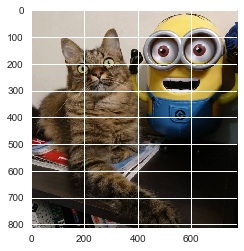

In [22]:
import skimage.io as skio

# Read image
img_skio = skio.imread(f_img)  # An arrary
plt.imshow(img_skio)
plt.show()

### PIL

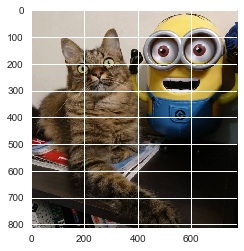

In [23]:
from PIL import Image

# Read image
img_PIL = Image.open(f_img)  # Still PIL object
img_PIL = np.array(img_PIL)  # Convert PIL object into array
plt.imshow(img_PIL)
plt.show()

### OpenCV

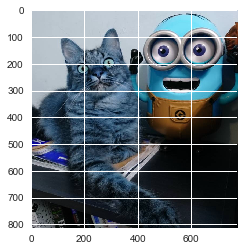

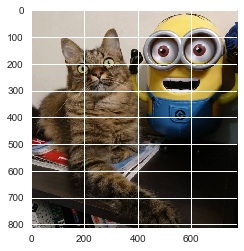

In [24]:
import cv2

# Read image
img_cv = cv2.imread(f_img)
plt.imshow(img_cv)
plt.show()

# Adjust color while reading
img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
plt.imshow(img_cv)
plt.show()

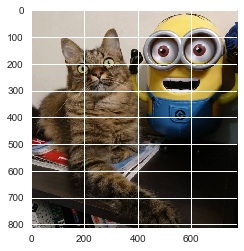

In [25]:
import scipy.io as sio

# Setup file path
f_img = os.path.join(dir_img, 'cat_and_minor.mat')

# Save image in .mat format
sio.savemat(file_name=f_img, mdict={'img': img_skio})

# Load image in .mat format
mat_arr = sio.loadmat(f_img)  # A dictionary
mat_arr = mat_arr['img']
plt.imshow(mat_arr)
plt.show()

<img src="img/前處理_格式調整.png" width="800">  
### 格式調整
* **子集**  
ㅤ
    + **元素索引**
        - df['col_name']['row_name']
        - df.col_name['row_name']
        - df.loc['row_name']['col_name']
        - df.iloc[row_no, col_num]  
ㅤ  
    + **欄索引**  
ㅤ
        - **單欄**
            * df.col_name
            * df['col_name']
            * df.loc[:,'col_name']
            * df.iloc[:,0]　　# Choose first column  
ㅤ
        - **多欄**
            * df[['col_name1', 'col_name2']]  
ㅤ
    + **列索引**
        - df.loc['row_name',:]
        - df.iloc[2,:]　　# Choose third row  
ㅤ      
    + **條件索引**
        - df[bool_vec]  
ㅤ  
* **串聯** [pd.concat([df1, df2,...])](https://reurl.cc/LZkgX)
* **合併** [pd.merge(df1, df2)](https://reurl.cc/mNmAj)
* **攤平** [df.melt()](https://reurl.cc/4G0nR)
* **類組** [df.groupby(['col_name'])](https://reurl.cc/Gl3Op)

#### **參考資料** 
   1. [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
   2. [利用python数据分析之数据聚合与分组（七）](https://zhuanlan.zhihu.com/p/27590154)

In [26]:
highschool_grades_df

,Midterm1,Midterm2,Final,Subject
Class,,,,
A,67,89,79,English
B,55,75,64,English
C,72,95,86,English
A,73,50,97,Math
B,81,95,74,Math
C,45,58,66,Math
A,73,63,93,Science
B,57,86,64,Science
C,83,59,58,Science


### 子集

In [27]:
# Element indexing
display(highschool_grades_df['Final']['A'])
display(highschool_grades_df.Final['A'])
display(highschool_grades_df.loc['A']['Final'])
display(highschool_grades_df.iloc[0::3,2])

A    79
A    97
A    93
Name: Final, dtype: int64

A    79
A    97
A    93
Name: Final, dtype: int64

Class
A    79
A    97
A    93
Name: Final, dtype: int64

Class
A    79
A    97
A    93
Name: Final, dtype: int64

In [28]:
# Columns indexing (A column)
display(highschool_grades_df.Midterm2)
display(highschool_grades_df['Midterm2'])
display(highschool_grades_df.loc[:,'Midterm2'])
display(highschool_grades_df.iloc[:,1])

# Columns indexing (Mutiple columns)
display(highschool_grades_df[['Midterm1', 'Midterm2']])

Class
A    89
B    75
C    95
A    50
B    95
C    58
A    63
B    86
C    59
Name: Midterm2, dtype: int64

Class
A    89
B    75
C    95
A    50
B    95
C    58
A    63
B    86
C    59
Name: Midterm2, dtype: int64

Class
A    89
B    75
C    95
A    50
B    95
C    58
A    63
B    86
C    59
Name: Midterm2, dtype: int64

Class
A    89
B    75
C    95
A    50
B    95
C    58
A    63
B    86
C    59
Name: Midterm2, dtype: int64

,Midterm1,Midterm2
Class,,
A,67,89
B,55,75
C,72,95
A,73,50
B,81,95
C,45,58
A,73,63
B,57,86
C,83,59


In [29]:
# Rows indexing
display(highschool_grades_df.loc['B',:])
display(highschool_grades_df.iloc[1::3,:])

,Midterm1,Midterm2,Final,Subject
Class,,,,
B,55,75,64,English
B,81,95,74,Math
B,57,86,64,Science


,Midterm1,Midterm2,Final,Subject
Class,,,,
B,55,75,64,English
B,81,95,74,Math
B,57,86,64,Science


In [30]:
# Normal slicing(.loc)
display(highschool_grades_df.loc[:, 'Midterm2':'Subject'])
display(highschool_grades_df.loc[:, 'Subject':'Midterm2':-1])
display(highschool_grades_df.loc[:, ['Subject','Midterm2']])

# Normal slicing(.iloc)
display(highschool_grades_df.iloc[[0,2,3], 0:3]) 

,Midterm2,Final,Subject
Class,,,
A,89,79,English
B,75,64,English
C,95,86,English
A,50,97,Math
B,95,74,Math
C,58,66,Math
A,63,93,Science
B,86,64,Science
C,59,58,Science


,Subject,Final,Midterm2
Class,,,
A,English,79,89
B,English,64,75
C,English,86,95
A,Math,97,50
B,Math,74,95
C,Math,66,58
A,Science,93,63
B,Science,64,86
C,Science,58,59


,Subject,Midterm2
Class,,
A,English,89
B,English,75
C,English,95
A,Math,50
B,Math,95
C,Math,58
A,Science,63
B,Science,86
C,Science,59


,Midterm1,Midterm2,Final
Class,,,
A,67,89,79
C,72,95,86
A,73,50,97


In [31]:
# Conditional slicing
display(highschool_grades_df[highschool_grades_df.Subject == 'English'])
display(highschool_grades_df[(highschool_grades_df.Midterm2 >= 60) & (highschool_grades_df.Subject == 'Science')])

,Midterm1,Midterm2,Final,Subject
Class,,,,
A,67,89,79,English
B,55,75,64,English
C,72,95,86,English


,Midterm1,Midterm2,Final,Subject
Class,,,,
A,73,63,93,Science
B,57,86,64,Science


### 串聯

In [32]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [33]:
# 沿縱軸合併
display(pd.concat([df1, df2]))

# 沿橫軸合併
display(pd.concat([df1, df2], axis=1))

# 取整個列表都有值的區域
display(pd.concat([df1, df2], join='inner'))  
display(pd.concat([df1, df2], axis=1, join='inner'))

# 重置索引
display(pd.concat([df1, df2], axis=1, join='inner', ignore_index=True))
display(pd.concat([df1, df2], axis=1, join='inner').reset_index(drop=True))

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


,B,D
0,B0,D0
1,B1,D1
2,B2,D2
3,B3,D3
2,B2,D2
3,B3,D3
6,B6,D6
7,B7,D7


,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


,0,1,2,3,4,5,6
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


,A,B,C,D,B,D,F
0,A2,B2,C2,D2,B2,D2,F2
1,A3,B3,C3,D3,B3,D3,F3


### 合併

In [34]:
# 保留相同部分
display(pd.merge(df1, df2, on=['B', 'D']))

# 全保留
display(pd.merge(df1, df2, on=['B', 'D'], how='outer'))

# 保留左表格並取右表格有相同的部分
display(pd.merge(df1, df2, on=['B', 'D'], how='left'))

# 保留右表格並取左表格有相同的部分
display(pd.merge(df1, df2, on=['B', 'D'], how='right'))

,A,B,C,D,F
0,A2,B2,C2,D2,F2
1,A3,B3,C3,D3,F3


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,F2
3,A3,B3,C3,D3,F3
4,NaN,B6,NaN,D6,F6
5,NaN,B7,NaN,D7,F7


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,F2
3,A3,B3,C3,D3,F3


,A,B,C,D,F
0,A2,B2,C2,D2,F2
1,A3,B3,C3,D3,F3
2,NaN,B6,NaN,D6,F6
3,NaN,B7,NaN,D7,F7


### 攤平

In [35]:
# melt函式會自動略過 Na
display(pd.merge(df1, df2, on=['B', 'D'], how='left'))
display(pd.merge(df1, df2, on=['B', 'D']).melt())

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,F2
3,A3,B3,C3,D3,F3


,variable,value
0,A,A2
1,A,A3
2,B,B2
3,B,B3
4,C,C2
5,C,C3
6,D,D2
7,D,D3
8,F,F2
9,F,F3


### 類組

In [36]:
# 印出 groupby 型態資料
highschool_grades_df_gb = highschool_grades_df.groupby(['Subject'])
for key, item in highschool_grades_df_gb:
    display(pd.DataFrame(highschool_grades_df_gb.get_group(key)))

,Midterm1,Midterm2,Final,Subject
Class,,,,
A,67,89,79,English
B,55,75,64,English
C,72,95,86,English


,Midterm1,Midterm2,Final,Subject
Class,,,,
A,73,50,97,Math
B,81,95,74,Math
C,45,58,66,Math


,Midterm1,Midterm2,Final,Subject
Class,,,,
A,73,63,93,Science
B,57,86,64,Science
C,83,59,58,Science


In [37]:
# 類組運算
display(highschool_grades_df_gb.size())
display(highschool_grades_df_gb.describe())
display(highschool_grades_df_gb.sum())
display(highschool_grades_df_gb.mean())
display(highschool_grades_df_gb.apply(lambda x: x.sort_values(by='Final', ascending='False')))

Subject
English    3
Math       3
Science    3
dtype: int64

Midterm1                                                     Midterm2  \
           count       mean        std   min   25%   50%   75%   max    count   
Subject                                                                         
English      3.0  64.666667   8.736895  55.0  61.0  67.0  69.5  72.0      3.0   
Math         3.0  66.333333  18.903263  45.0  59.0  73.0  77.0  81.0      3.0   
Science      3.0  71.000000  13.114877  57.0  65.0  73.0  78.0  83.0      3.0   

                    ...             Final                                    \
              mean  ...   75%   max count       mean        std   min   25%   
Subject             ...                                                       
English  86.333333  ...  92.0  95.0   3.0  76.333333  11.239810  64.0  71.5   
Math     67.666667  ...  76.5  95.0   3.0  79.000000  16.093477  66.0  70.0   
Science  69.333333  ...  74.5  86.0   3.0  71.666667  18.717194  58.0  61.0   

                           
          50%   75%   max  
Subject                    
English  79.0  82.5  86.0  
Math     74.0  85.5  97.0  
Science  64.0  78.5  93.0  

[3 rows x 24 columns]

,Midterm1,Midterm2,Final
Subject,,,
English,194,259,229
Math,199,203,237
Science,213,208,215


,Midterm1,Midterm2,Final
Subject,,,
English,64.666667,86.333333,76.333333
Math,66.333333,67.666667,79.000000
Science,71.000000,69.333333,71.666667


Midterm1  Midterm2  Final
Subject Class                           
English B            55        75     64
        A            67        89     79
        C            72        95     86
Math    C            45        58     66
        B            81        95     74
        A            73        50     97
Science C            83        59     58
        B            57        86     64
        A            73        63     93